### Consider only columns below and prepare a prediction model for predicting Price.

### Corolla<-Corolla[("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]
 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [69]:
#Read the data
data = pd.read_csv("D:/1.0 Studies/DataScience_Excelr/Kaggle/Competition1_ToyotaCorolla/train.csv",
                   encoding= 'unicode_escape')
data.shape

(1292, 39)

In [3]:
Toyota =data[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
Toyota.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,
142,16450,20,22588,97,1400,5,5,85,1110
1380,7950,75,57144,110,1600,5,5,85,1070
768,10950,59,79660,86,1300,5,5,85,1065
902,8950,65,60000,86,1300,3,5,69,1015
550,9950,55,44537,97,1400,3,5,69,1025


In [4]:
Toyota.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1292 entries, 142 to 1331
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1292 non-null   int64
 1   Age_08_04      1292 non-null   int64
 2   KM             1292 non-null   int64
 3   HP             1292 non-null   int64
 4   cc             1292 non-null   int64
 5   Doors          1292 non-null   int64
 6   Gears          1292 non-null   int64
 7   Quarterly_Tax  1292 non-null   int64
 8   Weight         1292 non-null   int64
dtypes: int64(9)
memory usage: 100.9 KB


In [5]:
Toyota[Toyota.duplicated()].shape

(1, 9)

In [6]:
Toyota[Toyota.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,
115,24950,8,13253,116,2000,5,5,234,1320


In [7]:
Toyota_cleaned1=Toyota.drop_duplicates() #Remove duplicates

In [8]:
Toyota_cleaned1[Toyota_cleaned1.isnull().any(axis=1)].head() #Checking NaN anywhere in the array

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,


In [9]:
np.round(Toyota_cleaned1.describe(),2)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1291.00,1291.00,1291.00,1291.00,1291.00,1291.00,1291.00,1291.00,1291.00
mean,10721.46,56.01,68670.36,101.42,1576.35,4.03,5.03,87.14,1071.81
std,3602.17,18.51,37697.69,15.26,443.63,0.95,0.20,40.79,49.84
min,4400.00,1.00,1.00,69.00,1300.00,2.00,3.00,19.00,1000.00
25%,8450.00,44.00,42655.00,86.00,1400.00,3.00,5.00,69.00,1040.00
50%,9900.00,61.00,63870.00,110.00,1600.00,4.00,5.00,85.00,1070.00
75%,11912.50,70.00,87698.50,110.00,1600.00,5.00,5.00,85.00,1085.00
max,31275.00,80.00,243000.00,192.00,16000.00,5.00,6.00,283.00,1480.00


In [10]:
Toyota_cleaned1['HP'].value_counts()

110    745
86     230
97     149
72      66
90      32
69      31
107     16
192     11
116      7
98       2
73       1
71       1
Name: HP, dtype: int64

In [11]:
Corr = Toyota_cleaned1.corr()
Corr

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.877495,-0.569082,0.321223,0.129188,0.176261,0.070592,0.204942,0.600967
Age_08_04,-0.877495,1.000000,0.506603,-0.162206,-0.100236,-0.136873,-0.007962,-0.194335,-0.487874
KM,-0.569082,0.506603,1.000000,-0.332778,0.097143,-0.035912,0.007513,0.295212,-0.030323
HP,0.321223,-0.162206,-0.332778,1.000000,0.038720,0.100970,0.217820,-0.302874,0.104244
cc,0.129188,-0.100236,0.097143,0.038720,1.000000,0.078940,0.014876,0.297853,0.342046
Doors,0.176261,-0.136873,-0.035912,0.100970,0.078940,1.000000,-0.166719,0.093743,0.304134
Gears,0.070592,-0.007962,0.007513,0.217820,0.014876,-0.166719,1.000000,-0.004472,0.025695
Quarterly_Tax,0.204942,-0.194335,0.295212,-0.302874,0.297853,0.093743,-0.004472,1.000000,0.629073
Weight,0.600967,-0.487874,-0.030323,0.104244,0.342046,0.304134,0.025695,0.629073,1.000000


Age and KM, Weight and Quarterly Tax seem correlated

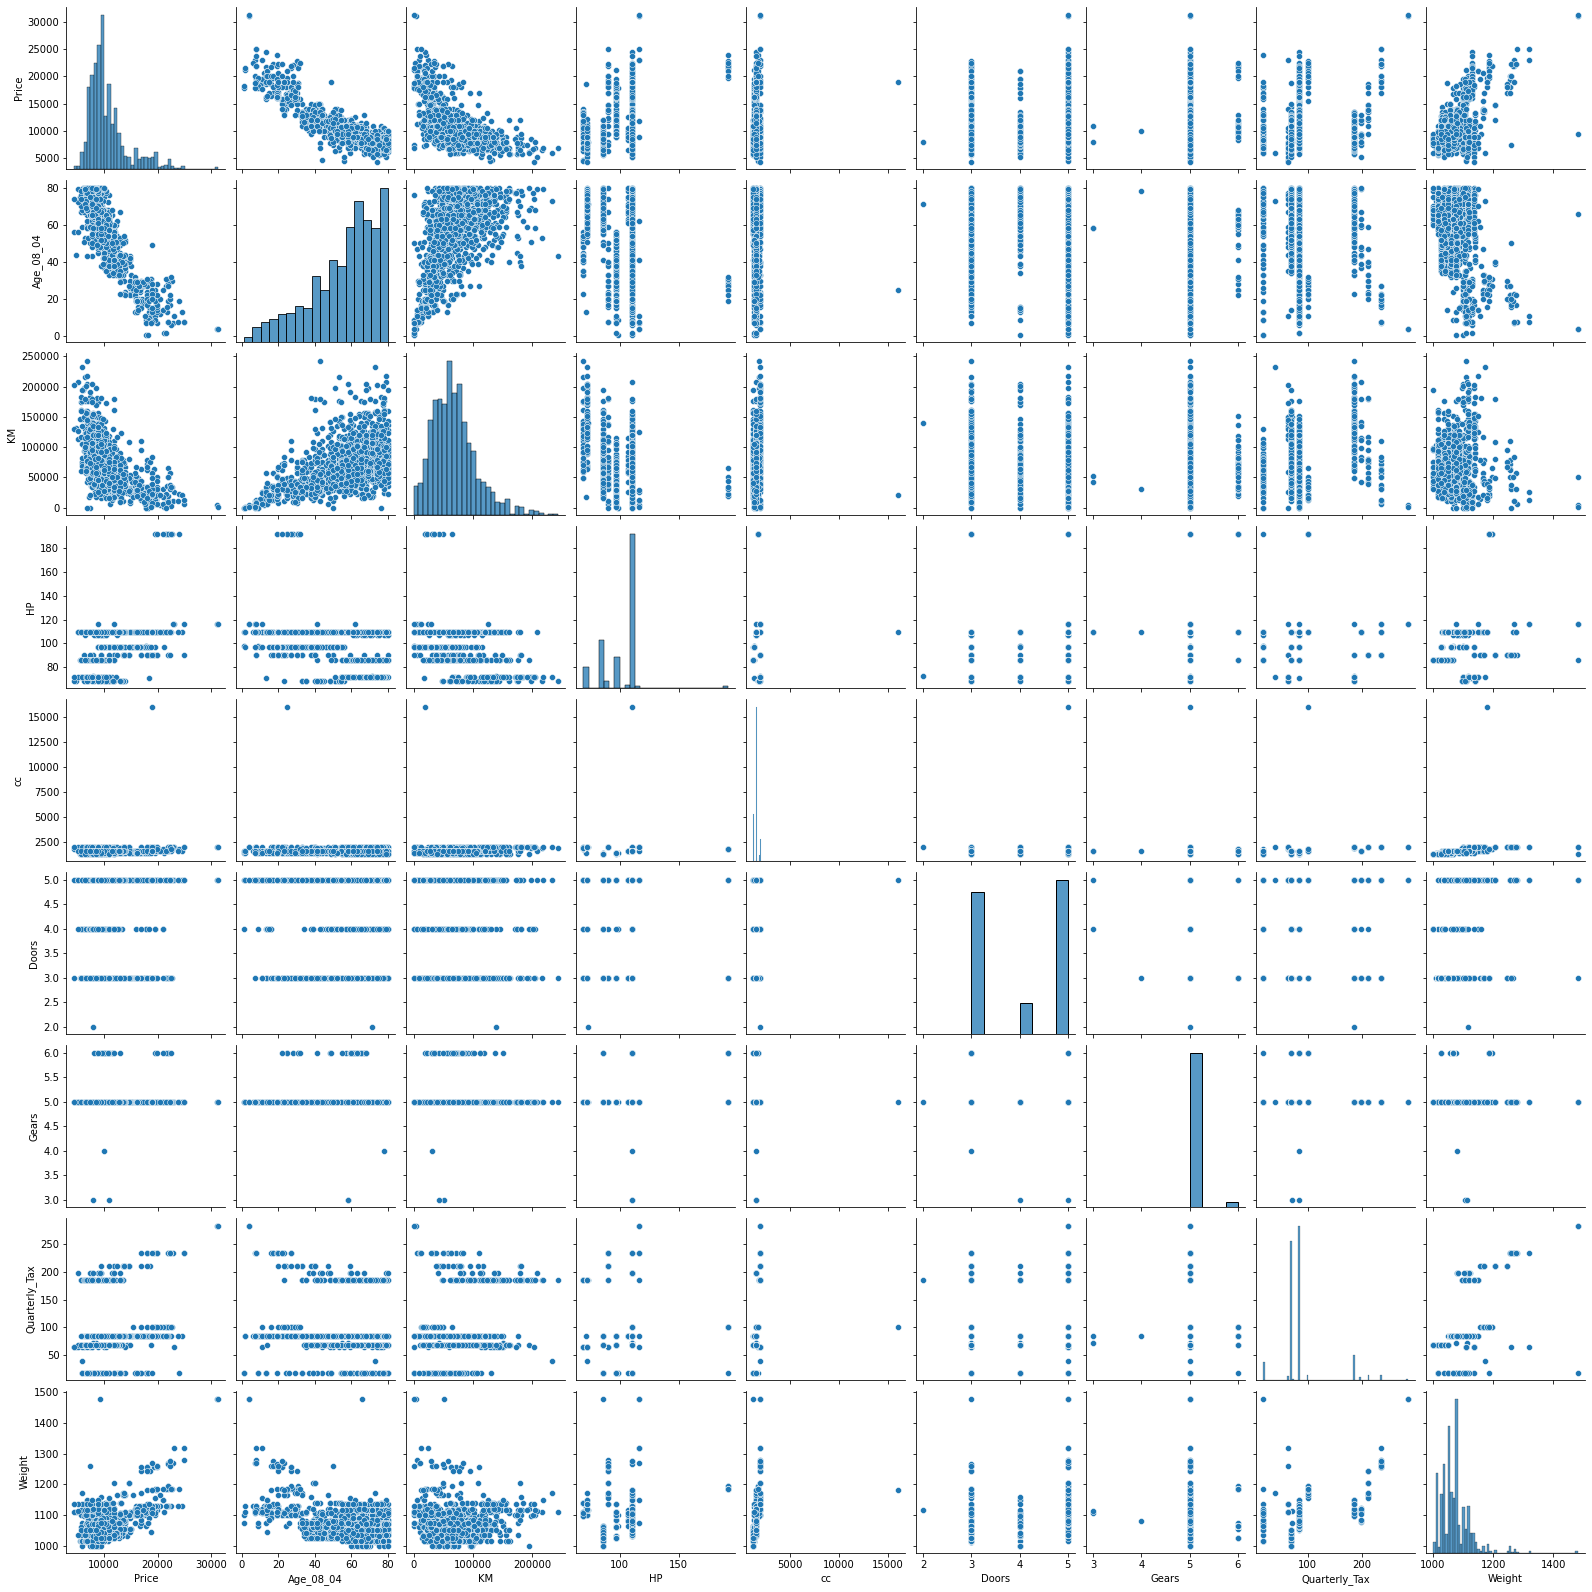

In [12]:
sns.pairplot(Toyota_cleaned1)

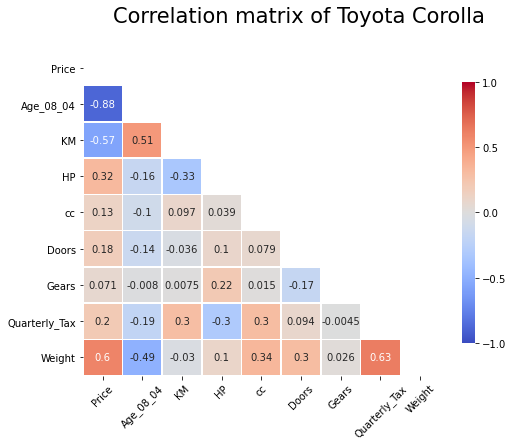

In [13]:
df =Toyota_cleaned1.iloc[:,0:9]
corr = df.corr()

# Generating a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(8, 6))

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap='coolwarm', 
            cbar_kws = {'shrink': 0.8,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
            vmin=-1, vmax=1, 
            annot = True,
            annot_kws = {"size": 10},
            center=0, linewidths=.5)

#add the column names as labels
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns, rotation = 45)
f.suptitle('Correlation matrix of Toyota Corolla', fontsize=21)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [14]:
#Doors, HP, Gears, CC should be categorical??

In [15]:
# Considering all the variables and creating the model
model_v1=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=Toyota_cleaned1).fit()
model_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1056.
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        12:55:41   Log-Likelihood:                -11096.
No. Observations:                1291   AIC:                         2.221e+04
Df Residuals:                    1282   BIC:                         2.226e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8715.1774   1499.203     -5.813      0.000   -1.17e+04   -5774.017
Age_08_04      -119.1440      2.751    -43.313      0.000    -124.541    -113.747
KM               -0.0204      0.001    -15.773      0.000      -0.023      -0.018
HP               28.3117      2.881      9.827      0.000      22.660      33.964
cc               -0.1336      0.089     -1.505      0.133      -0.308       0.041
Doors           -28.2017     41.491     -0.680      0.497    -109.600      53.197
Gears           604.6939    195.277      3.097      0.002     221.597     987.791
Quarterly_Tax     1.2299      1.391      0.884      0.377      -1.500       3.960
Weight           20.3545      1.206     16.876      0.000      17.988      22.721
==============================================================================
Omnibus:                      128.018   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              759.931
Skew:                          -0.224   Prob(JB):                    9.62e-166
Kurtosis:                       6.732   Cond. No.                     3.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
#t and p-Values
print(model_v1.tvalues, '\n', model_v1.pvalues)

Intercept        -5.813208
Age_08_04       -43.312569
KM              -15.773293
HP                9.826912
cc               -1.504741
Doors            -0.679701
Gears             3.096602
Quarterly_Tax     0.883903
Weight           16.876173
dtype: float64 
 Intercept         7.726763e-09
Age_08_04        3.131187e-253
KM                2.316336e-51
HP                5.052907e-22
cc                1.326371e-01
Doors             4.968166e-01
Gears             2.000001e-03
Quarterly_Tax     3.769146e-01
Weight            7.383121e-58
dtype: float64


In [17]:
#R squared values
(model_v1.rsquared,model_v1.rsquared_adj)

(0.8682064944062866, 0.867384070034407)

In [18]:
y_pred = model_v1.predict(Toyota_cleaned1)
y_pred
#RMSE 1 
np.sqrt((np.mean((y_pred-Toyota_cleaned1.Price)**2)))

1307.201836273452

### Analyse the correlations bw variables (subsets) 
### Age, KM, Weight and Tax

In [19]:
#Age and Price are highly correlated. Check whether Age varies with KM, Weight and Tax too.

In [20]:
#Age KM
model_Age=smf.ols('Age_08_04~KM+Weight+Quarterly_Tax',data=Toyota_cleaned1).fit()
model_Age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Age_08_04   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     401.8
Date:                Wed, 12 May 2021   Prob (F-statistic):          3.88e-184
Time:                        12:55:41   Log-Likelihood:                -5172.1
No. Observations:                1291   AIC:                         1.035e+04
Df Residuals:                    1287   BIC:                         1.037e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       208.8871     10.239     20.402      0.000     188.801     228.974
KM                0.0003   1.08e-05     23.662      0.000       0.000       0.000
Weight           -0.1559      0.010    -15.584      0.000      -0.175      -0.136
Quarterly_Tax    -0.0378      0.013     -2.959      0.003      -0.063      -0.013
==============================================================================
Omnibus:                        8.824   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               12.170
Skew:                           0.007   Prob(JB):                      0.00228
Kurtosis:                       3.475   Cond. No.                     2.16e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# Weight on KM and Tax
model_Weight=smf.ols('Weight~KM+Quarterly_Tax',data=Toyota_cleaned1).fit()
model_Weight.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     520.3
Date:                Wed, 12 May 2021   Prob (F-statistic):          2.43e-166
Time:                        12:55:42   Log-Likelihood:                -6495.3
No. Observations:                1291   AIC:                         1.300e+04
Df Residuals:                    1288   BIC:                         1.301e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1018.8792      2.755    369.798      0.000    1013.474    1024.284
KM               -0.0003   2.87e-05    -10.911      0.000      -0.000      -0.000
Quarterly_Tax     0.8539      0.027     32.224      0.000       0.802       0.906
==============================================================================
Omnibus:                      917.028   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29806.464
Skew:                           2.868   Prob(JB):                         0.00
Kurtosis:                      25.830   Cond. No.                     2.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#In model_v1 the p value of Doors (0.98) suggest that number of doors don't have any influence over price estimation. 
#We can drop 'Doors' from our variation.

In [23]:
Toyota_cleaned2=Toyota_cleaned1.drop('Doors',axis=1)
Toyota_cleaned2

,Price,Age_08_04,KM,HP,cc,Gears,Quarterly_Tax,Weight
Id,,,,,,,,
142,16450,20,22588,97,1400,5,85,1110
1380,7950,75,57144,110,1600,5,85,1070
768,10950,59,79660,86,1300,5,85,1065
902,8950,65,60000,86,1300,5,69,1015
550,9950,55,44537,97,1400,5,69,1025
...,...,...,...,...,...,...,...,...
752,8950,61,81170,110,1600,5,69,1040
1362,6750,69,60050,110,1600,5,69,1050
1283,7400,75,74096,110,1600,5,69,1050


In [24]:
# Considering all the variables and creating the model
model_v2=smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=Toyota_cleaned2).fit()
model_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1207.
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        12:55:42   Log-Likelihood:                -11096.
No. Observations:                1291   AIC:                         2.221e+04
Df Residuals:                    1283   BIC:                         2.225e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8716.1669   1498.888     -5.815      0.000   -1.17e+04   -5775.627
Age_08_04      -119.1867      2.750    -43.348      0.000    -124.581    -113.793
KM               -0.0204      0.001    -15.799      0.000      -0.023      -0.018
HP               28.1836      2.874      9.806      0.000      22.545      33.822
cc               -0.1324      0.089     -1.492      0.136      -0.306       0.042
Gears           631.1068    191.331      3.299      0.001     255.751    1006.463
Quarterly_Tax     1.3239      1.384      0.956      0.339      -1.392       4.039
Weight           20.1317      1.160     17.348      0.000      17.855      22.408
==============================================================================
Omnibus:                      123.784   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              715.208
Skew:                          -0.211   Prob(JB):                    4.95e-156
Kurtosis:                       6.622   Cond. No.                     3.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
y_pred2 = model_v2.predict(Toyota_cleaned2)
y_pred2
#RMSE 2 
np.sqrt((np.mean((y_pred2-Toyota_cleaned2.Price)**2)))

1307.4373527079665

In [26]:
mean_squared_error(Toyota_cleaned2.Price, y_pred2, squared=False)

1307.4373527079656

### Calculate Variance Inflation Factor

In [27]:
Toyota_cleaned2.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Gears', 'Quarterly_Tax',
       'Weight'],
      dtype='object')

In [28]:
rsq_Age = smf.ols('Age_08_04~KM+HP+cc+Gears+Quarterly_Tax+Weight',
                 data=Toyota_cleaned2).fit().rsquared  
vif_Age = 1/(1-rsq_Age)

rsq_KM = smf.ols('KM~Age_08_04+HP+cc+Gears+Quarterly_Tax+Weight',
                 data=Toyota_cleaned2).fit().rsquared  
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~KM+Age_08_04+cc+Gears+Quarterly_Tax+Weight',
                 data=Toyota_cleaned2).fit().rsquared  
vif_HP = 1/(1-rsq_HP)

rsq_cc = smf.ols('cc~HP+KM+Age_08_04+Gears+Quarterly_Tax+Weight',
                 data=Toyota_cleaned2).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_Gears = smf.ols('Gears~cc+HP+KM+Age_08_04+Quarterly_Tax+Weight',
                 data=Toyota_cleaned2).fit().rsquared
vif_Gears = 1/(1-rsq_Gears)

rsq_Quarterly_Tax = smf.ols('Quarterly_Tax~Gears+cc+HP+KM+Age_08_04+Weight',
                 data=Toyota_cleaned2).fit().rsquared
vif_Quarterly_Tax = 1/(1-rsq_Quarterly_Tax)


rsq_Weight = smf.ols('Weight~Quarterly_Tax+Gears+cc+HP+KM+Age_08_04',
                 data=Toyota_cleaned2).fit().rsquared
vif_Weight = 1/(1-rsq_Weight)


# Storing vif values in a data frame
d1 = {'Variables':['Age_08_04', 'KM', 'HP', 'cc', 'Gears', 'Quarterly_Tax',
       'Weight'],
      'VIF':[vif_Age,vif_KM,vif_HP,vif_cc,vif_Gears,vif_Quarterly_Tax,vif_Weight]}

Vif_frame = np.round(pd.DataFrame(d1),2)  
Vif_frame

,Variables,VIF
0,Age_08_04,1.94
1,KM,1.78
2,HP,1.44
3,cc,1.16
4,Gears,1.06
5,Quarterly_Tax,2.39
6,Weight,2.51


VIFs are not very high so all variables not correlated and are OK for consideration.

### Residual Analysis, Test for Normality, Q-Q Plot

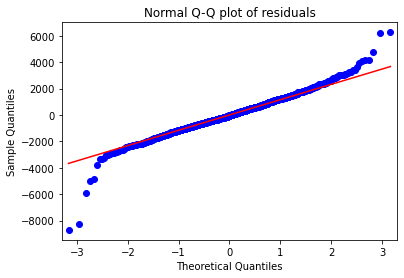

In [29]:
import statsmodels.api as sm
qqplot=sm.qqplot(model_v2.resid, line ='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [30]:
list(np.where(model_v2.resid>1000)) # A difference of $1000

[array([   2,    5,   10,   15,   17,   21,   25,   32,   39,   44,   45,
          46,   51,   52,   57,   58,   61,   91,   94,   97,  100,  103,
         114,  120,  131,  135,  141,  144,  146,  147,  152,  159,  161,
         167,  169,  171,  172,  176,  177,  179,  180,  184,  187,  193,
         200,  203,  204,  207,  225,  228,  231,  232,  233,  238,  239,
         240,  242,  247,  251,  260,  269,  270,  286,  290,  291,  292,
         295,  301,  302,  311,  323,  324,  325,  327,  335,  336,  338,
         340,  348,  351,  353,  357,  359,  362,  374,  380,  381,  383,
         385,  389,  390,  398,  402,  410,  414,  419,  421,  425,  428,
         433,  434,  436,  446,  466,  467,  477,  480,  492,  500,  501,
         515,  516,  519,  520,  533,  537,  541,  543,  544,  545,  547,
         548,  549,  552,  561,  568,  575,  577,  585,  593,  594,  602,
         607,  608,  615,  618,  619,  621,  632,  634,  635,  637,  657,
         658,  666,  668,  669,  674, 

### Residual Plot for Homoscedasticity

In [31]:
#Plot standardized values of residuals and fitted values
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

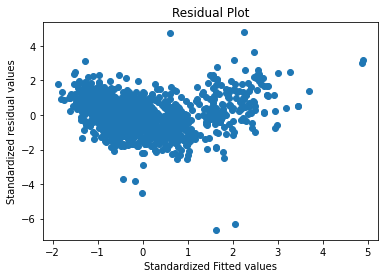

In [32]:
plt.scatter(get_standardized_values(model_v2.fittedvalues),
            get_standardized_values(model_v2.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

There is a moderate U shaped pattern

Our data set is not homoscedastic

### Residual vs. Regressors

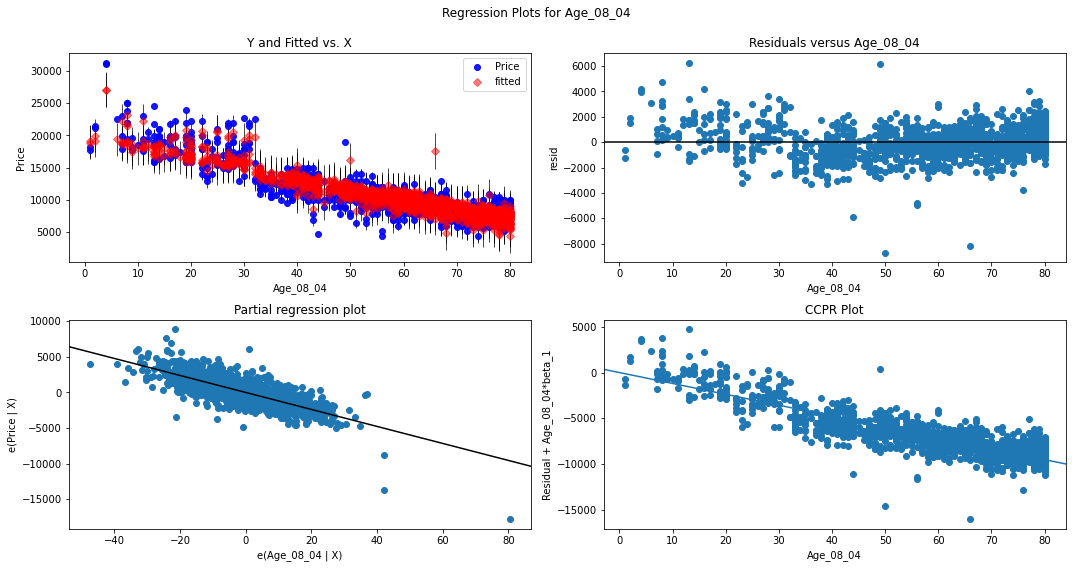

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_v2, "Age_08_04", fig=fig)
plt.show()

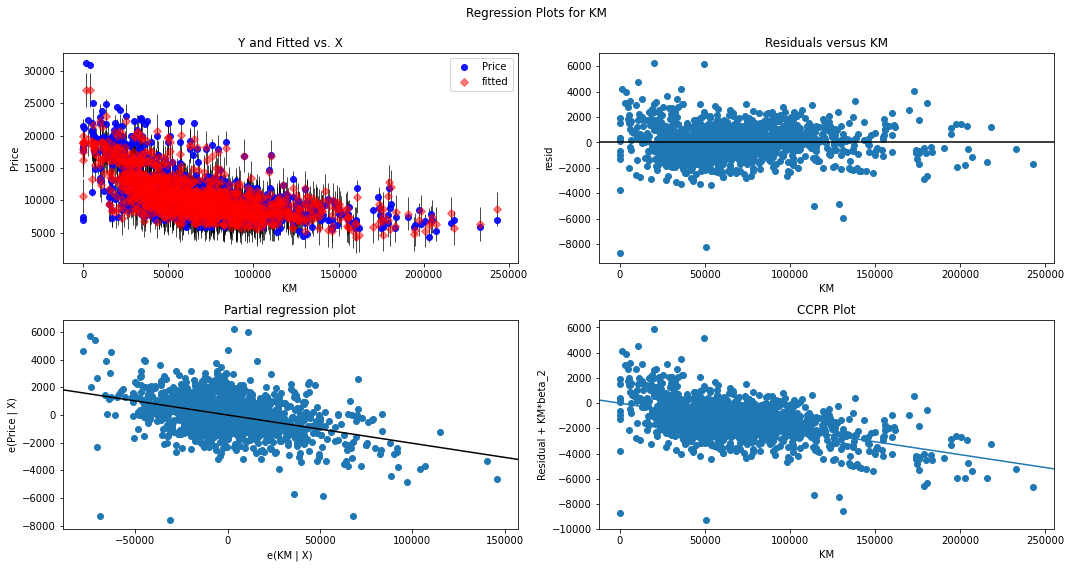

In [34]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_v2, "KM", fig=fig)
plt.show()

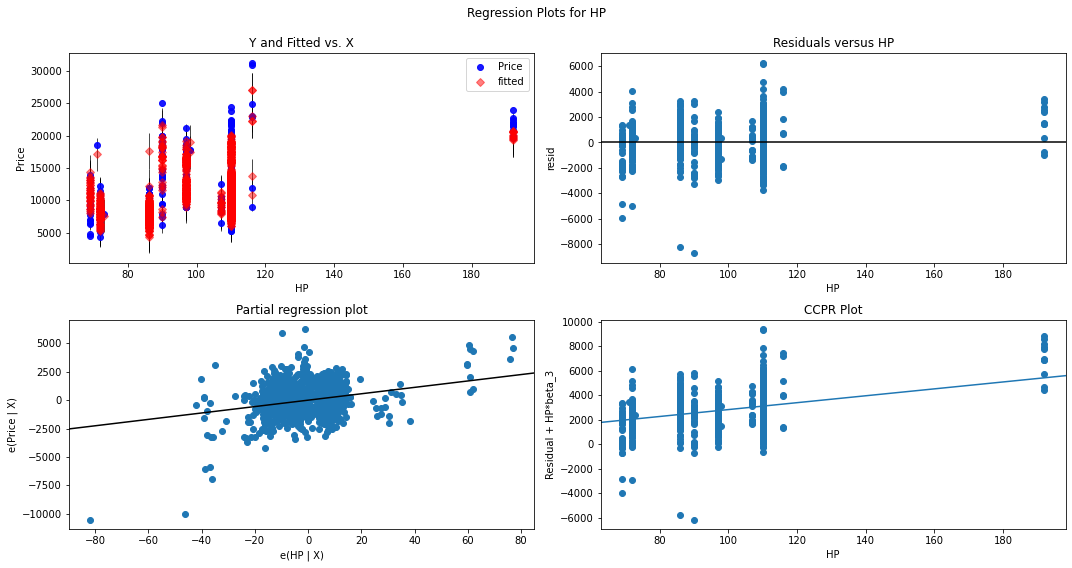

In [35]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_v2, "HP", fig=fig)
plt.show()

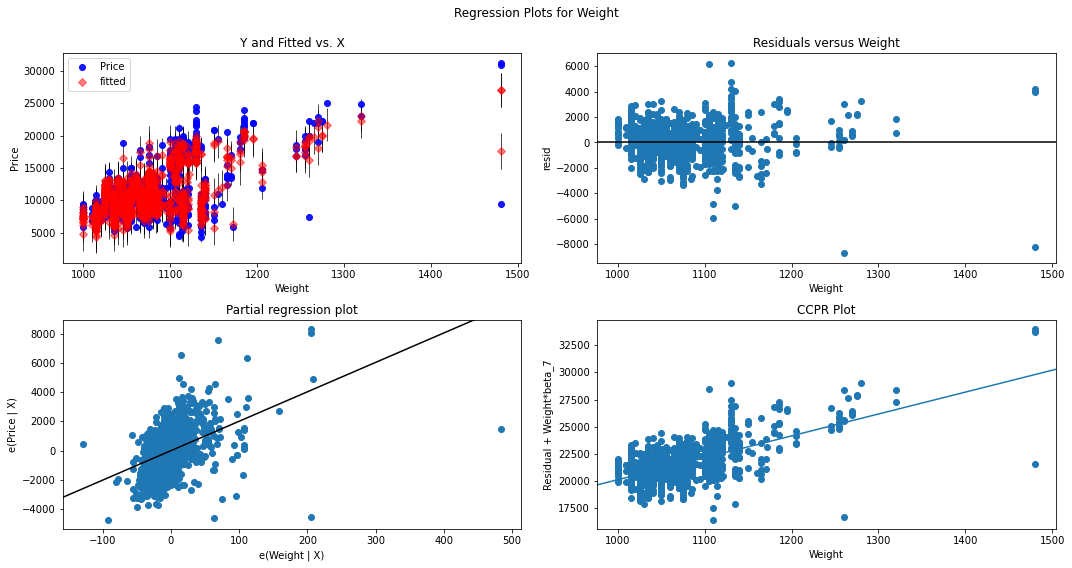

In [36]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_v2, "Weight", fig=fig)
plt.show()

### Detection of Influence/Outliers
### Cook's Distance

In [37]:
model_influence = model_v2.get_influence()
(c, _) = model_influence.cooks_distance

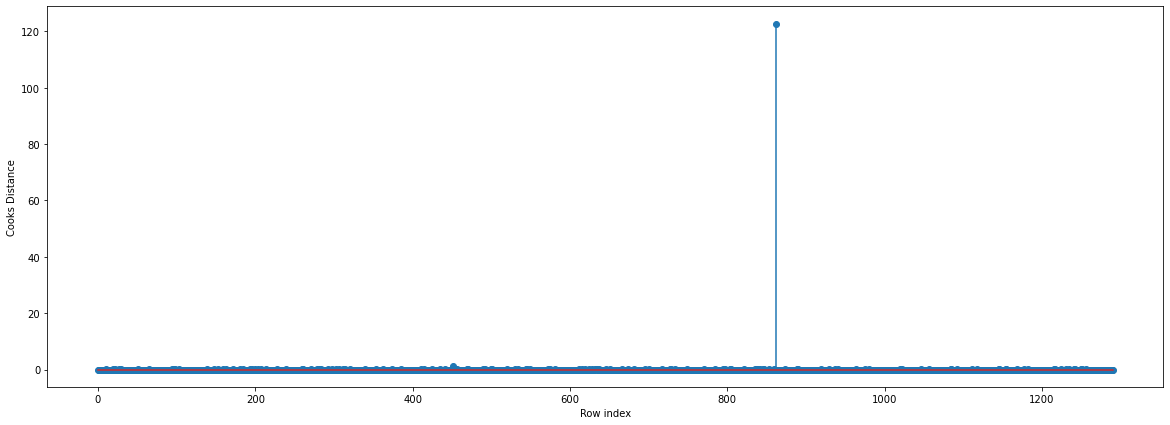

In [38]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Toyota_cleaned2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [39]:
#Check how lengths look like
model_influence = model_v2.get_influence()
(c, _) = model_influence.cooks_distance

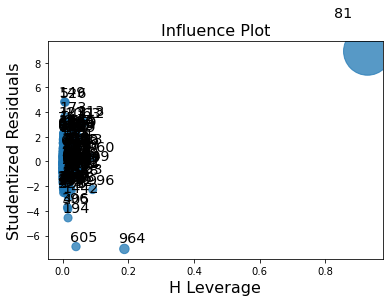

In [40]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_v2)
plt.show() #How do I increase the size of the plot?

In [41]:
k = Toyota_cleaned2.shape[1]
n = Toyota_cleaned2.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff
(np.argmax(c),np.max(c))

(862, 122.79419055472889)

In [42]:
leverage_cutoff

0.020914020139426802

In [43]:
np.argwhere(c>.021)

array([[  97],
       [ 103],
       [ 196],
       [ 200],
       [ 207],
       [ 320],
       [ 451],
       [ 469],
       [ 572],
       [ 805],
       [ 853],
       [ 862],
       [1250],
       [1251],
       [1256]], dtype=int64)

In [44]:
Toyota_cleaned2[Toyota_cleaned2.index.isin([97,103,196,200,207,320,451,469,572,805,853,862,1250,1251,1256])] 
#Just to check. These point could be influencers.

,Price,Age_08_04,KM,HP,cc,Gears,Quarterly_Tax,Weight
Id,,,,,,,,
469,9950,46,68414,97,1400,5,69,1025
103,18500,13,18000,71,1400,5,85,1125
805,9995,61,73894,110,1600,6,85,1065
451,11450,56,74500,97,1400,5,69,1025
862,7995,62,64797,110,1600,5,85,1075
1251,6950,70,81663,110,1600,5,69,1050
196,13250,41,123425,69,1900,5,185,1140
320,9900,42,37000,97,1400,5,69,1025
200,9950,42,105699,97,1400,5,69,1025


### Improving the model

In [45]:
#Drop 80,81,223 and 964 observations
Toyota_cleaned3=Toyota_cleaned2.drop(Toyota_cleaned2.index[[80]],axis=0).reset_index()

In [46]:
#Toyota_cleaned3=Toyota_cleaned3.drop(['index'],axis=1)

In [47]:
# Build New Model
model_v3=smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=Toyota_cleaned3).fit()
model_v3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1204.
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        12:55:51   Log-Likelihood:                -11088.
No. Observations:                1290   AIC:                         2.219e+04
Df Residuals:                    1282   BIC:                         2.223e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8720.4310   1499.447     -5.816      0.000   -1.17e+04   -5778.793
Age_08_04      -119.2049      2.751    -43.333      0.000    -124.602    -113.808
KM               -0.0204      0.001    -15.793      0.000      -0.023      -0.018
HP               28.2050      2.876      9.807      0.000      22.563      33.847
cc               -0.1321      0.089     -1.488      0.137      -0.306       0.042
Gears           630.9743    191.397      3.297      0.001     255.489    1006.459
Quarterly_Tax     1.3257      1.385      0.957      0.339      -1.391       4.042
Weight           20.1344      1.161     17.344      0.000      17.857      22.412
==============================================================================
Omnibus:                      123.522   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              712.671
Skew:                          -0.211   Prob(JB):                    1.76e-155
Kurtosis:                       6.617   Cond. No.                     3.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
y_pred3 = model_v3.predict(Toyota_cleaned3)
mean_squared_error(Toyota_cleaned3.Price, y_pred3, squared=False)

1307.8797551605958

In [49]:
#Check how lengths look like
model_influence = model_v3.get_influence()
(c3, _) = model_influence.cooks_distance
(np.argmax(c3),np.max(c3))

(861, 122.66615369756477)

In [50]:
np.where(c3>.5)

(array([450, 861], dtype=int64),)

In [64]:
#Drop observation no. 219
Toyota_cleaned4=Toyota_cleaned3.drop(Toyota_cleaned3.index[[450,861]],axis=0)

In [52]:
# Build New Model
model_v4=smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=Toyota_cleaned4).fit()
model_v4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     1381.
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        12:55:51   Log-Likelihood:                -10991.
No. Observations:                1288   AIC:                         2.200e+04
Df Residuals:                    1280   BIC:                         2.204e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.548e+04   1522.360    -10.171      0.000   -1.85e+04   -1.25e+04
Age_08_04      -112.0457      2.651    -42.263      0.000    -117.247    -106.845
KM               -0.0170      0.001    -13.394      0.000      -0.019      -0.014
HP               32.9425      2.872     11.472      0.000      27.309      38.576
cc               -3.5037      0.319    -10.990      0.000      -4.129      -2.878
Gears           623.2952    180.011      3.463      0.001     270.146     976.444
Quarterly_Tax     4.0534      1.474      2.750      0.006       1.162       6.945
Weight           30.1453      1.336     22.556      0.000      27.523      32.767
==============================================================================
Omnibus:                      104.068   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              573.622
Skew:                          -0.025   Prob(JB):                    2.75e-125
Kurtosis:                       6.269   Cond. No.                     3.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
#Check how lengths look like
model_influence = model_v4.get_influence()
(c4, _) = model_influence.cooks_distance
(np.argmax(c4),np.max(c4))

(570, 0.36227858746775604)

#### Cook's distance is less than 0.5, we can stop iteration for final model

In [54]:
y_pred4 = model_v4.predict(Toyota_cleaned4)
mean_squared_error(Toyota_cleaned4.Price, y_pred4, squared=False)

1229.21870191843

In [73]:
test=pd.read_csv('D:/1.0 Studies/DataScience_Excelr/Kaggle/Competition1_ToyotaCorolla/test.csv')
test_pred = model_v4.predict(test)

In [75]:
my_submission = pd.DataFrame({'Id': test.Id,'Price': test_pred})
my_submission.to_csv('Submission.csv', index=False)